<a href="https://colab.research.google.com/github/cfreeman22/loan_modeling_project/blob/main/loan_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Modeling Project 
# Which customer is most likely to get a loan?
Presented By Christian Freeman 
Jan 15, 2011  

#Project Planning
## PLAN ==> Acquire ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver

Understanding consumer behavior can quite chanlenging, especially when the product we offer our customers is a service rather than a tangible physical products. In the case of predicting which customer is most likely to get a loan,, I will perform the following:


- Prepare the data for visualization using a customized  module wrangle.py
- Identify patterns and insights 
- Document key observations and relationships between variables 

 
## Goals and summary
My goal in this project is to:

- Identify the characteristics of customers who are more likely to get a loan, and the potential reasons for this behavior.
- Build a ML model to predict which customer may sign up for a loan
So that recommendations are made based on the findings to help increase the chances of giving  a loan the the right customer.
- I will be using Python, Pandas, Matplotlib, Seaborn, and Scikit-Learn libraries to analyse and create ML classification model.

## Initial Questions
* What are unique characteristics of our customers?
* What factors increase their chances of getting a loan ?
* can we predict loan subscribers ?
 
## Executive Summary
### Findings Include:
- Many outliers in Income, Mortgage , and CCAvg colums
- Experience column has  some 0 values as well as some  negative values including -1,-2, -3 . All were converted to absolute value, since replacing with the mean experience of 20 years did not make sense. This is because  most customers with these values have less than 30 years of age


In [59]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# libaries to help with data visualization

import seaborn as sns
import matplotlib.pyplot as plt
# This is a premade module for exploration to help make the notebook readeable 
import  wrangle
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample
# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Acquire Data

- Data provided in the curriculum for the project

In [6]:
#loading our data in a dataframe
raw_data = pd.read_csv('Loan_Modelling.csv')

In [7]:
raw_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
# making a copy of the data
loan= raw_data.copy()

In [9]:
#viewing the shape
loan.shape

(5000, 14)

In [10]:
# information about data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
# descriptive statistical summary 
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
# Performed values counts on all the columns and the Experience column has negative values
loan.Experience.value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

## Observations 
- Dataset has 5000 rows and 14 colums
- categorical columns are Family, Education, Securities_Account ,CD_Account, Online, CreditCard, Personal_Loan
- Quantitative columns are Age, Income , CCAvg, and Mortgage 
- Target Variable is 'Personal_Loan'
- No missing values 
- Experience column has negative values and i am going to use abs() function to resolve that
- Mean Age is 45 
- Mean Income, Mortgage , and CCAvg are greater then their repective median. This suggest we may have some outliers


# Prepare For Exploration

### Univariate Analysis 

In [14]:
# Replacing negative Experience with absolute value. 
loan['Experience'] = loan['Experience'].abs()

In [15]:
loan.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [16]:
# Declaring variable to use in our premade functions in the wrangle module 
cat_var = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard']
cat_vars = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
quant_vars = ['Age','Income','CCAvg','Mortgage']
quant_vars2 = ['Age','Income','CCAvg']
target = 'Personal_Loan'

# Explore
## Univariate visualization 
- Exploring the data using custom made functions stored in the wrangle module

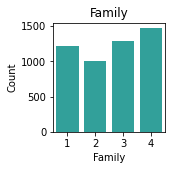

   Family  Count  Percent
1       4   1472    29.44
2       3   1296    25.92
4       1   1222    24.44
3       2   1010    20.20
_________________________________________________________________


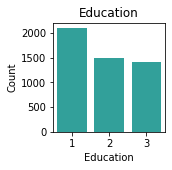

   Education  Count  Percent
1          1   2096    41.92
3          2   1501    30.02
2          3   1403    28.06
_________________________________________________________________


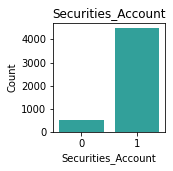

   Securities_Account  Count  Percent
0                   1   4478    89.56
1                   0    522    10.44
_________________________________________________________________


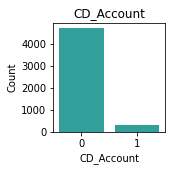

   CD_Account  Count  Percent
0           0   4698    93.96
1           1    302     6.04
_________________________________________________________________


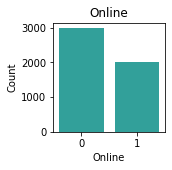

   Online  Count  Percent
1       0   2984    59.68
0       1   2016    40.32
_________________________________________________________________


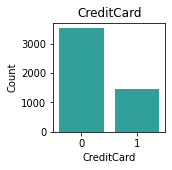

   CreditCard  Count  Percent
0           0   3530     70.6
1           1   1470     29.4
_________________________________________________________________


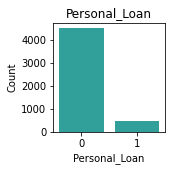

   Personal_Loan  Count  Percent
0              0   4520     90.4
1              1    480      9.6
_________________________________________________________________


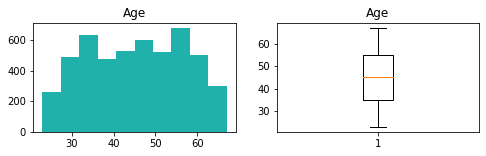

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


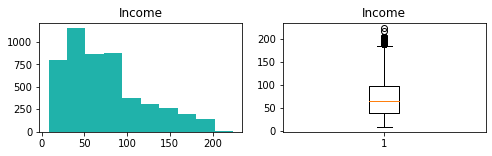

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


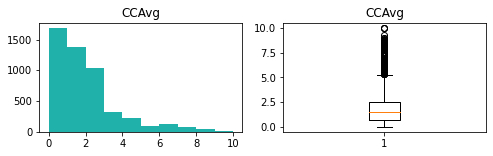

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64


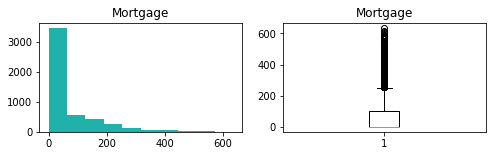

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


In [17]:
# calling explore_univariate() function from wrangle to perform univariate Analysis 
wrangle.explore_univariate(loan, cat_vars, quant_vars)

## Key Takeaway from the Univariate Analysis
- Family of 4 represent the majority of the dataset with 29.44 % of the entire data. Followed by family of 3, 1 and 2 with 25.92%, 24.44%, and 20.20% respectively.
- 41.92% are udergrad, 30.02% are graduates, and 28.06% have Advanced/Professional degrees 
- 90.4% of customers do not have personal loan While 9.9% do 
- 89.56% have  Security Accounts, and 10.44% do not 
- 93.96% do not have a Certificate of Deposit while only 6.04% do
- 59.58% don’t use internet banking while 40.32% do
- 70.6% do not have a credit card, while only 29.4% do
- Age has somewhat a uniform distribution with a minimum age of 23, and maximum of 67
- Income is skewed to the right and the graph indicate some outliers 

- Average Spending on credit card (CCavg) is skewed to the right , and have some outliers
- Mortgage is skewed to the right, and the is a stron indication that most customers do not have a mortgage  

### Bivariate Analysis 
#### Hypotheses Questions
- Question 1) H0 = The Average of the family having personal loan is the same in each family groups
- Question 1) H1 = The Average of the family having personal loan is different in each group
                 
------------------------------------------------------------------------------
- Question 2) H0 = The Average of  customers having personal loan is the same in each education groups
- Question 2) H1 = The Average  of customers having personal loan is different in each group
------------------------------------------------------------------------------
- Question 3) H0 = The Average  of  customers having personal loan is the same for those who have Security Account and those who don’t 
- Question 3) H1 = The Average  of customers  having personal loan is different in each subgroup
______________________________________________________________________________
- Question 4) H0 = The Average  of  customers having personal loan is the same for those who have Certificate of deposit Account and those who don’t 
- Question 4) H1 = The Average  of customers  having personal loan is different in each subgroup
--------------------------------------------------------------------------------
- Question 5) H0 = The Average  of  customers having personal loan is the same for those who have Online banking and those who don’t 
- Question 5) H1 = The Average  of customers  having personal loan is different in each subgroup
-------------------------------------------------------------------------------
- Question 6) H0 = The Average  of  customers having personal loan is the same for those who have a Credit card and those who don’t 
- Question 6) H1 = The Average  of customers  having personal loan is different in each subgroup
-------------------------------------------------------------------------------
- Question 7) H0 = The average age of customers  makes a difference in having personal loan
- Question 7) H1 = The Average age of customers  does not make a difference whether or not the customer will have personal loan
--------------------------------------------------------------------------------
- Question 8) H0 = The Average Income of customers  makes a difference in having personal loan
- Question 8) H1 = The Average Income of customers  does not make a difference whether or not the customer will have personal loan
--------------------------------------------------------------------------------
- Question 9) H0 = The average spending of customers  makes a difference in having personal loan
- Question 9) H1 = The Average Spending of customers  does not make a difference whether or not the customer will have personal loan
-------------------------------------------------------------------------------
- Question 10) H0 = The average mortgage  of customers  makes a difference in having personal loan
- Question 10) H1 = The Average mortgage  of customers  does not make a difference whether or not the customer will have personal loan

## Bivariate visualization 

Family 
_____________________

        chi2   p-value  degrees of freedom
0  29.676116  0.000002                   3

observed:
 Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000

expected:
           0        1
0  1330.688  141.312
1  1171.584  124.416
2   913.040   96.960
3  1104.688  117.312


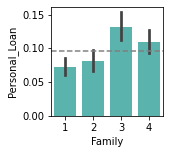


_____________________

Education 
_____________________

         chi2       p-value  degrees of freedom
0  111.239872  6.991474e-25                   2

observed:
 Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000

expected:
           0        1
0  1894.784  201.216
1  1268.312  134.688
2  1356.904  144.096


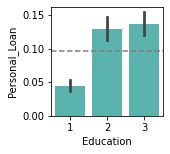


_____________________

Securities_Account 
_____________________

       chi2   p-value  degrees of freedom
0  2.172311  0.140515                   1

observed:
 Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000

expected:
           0        1
0  4048.112  429.888
1   471.888   50.112


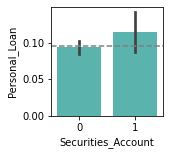


_____________________

CD_Account 
_____________________

         chi2        p-value  degrees of freedom
0  495.904242  7.398298e-110                   1

observed:
 Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000

expected:
           0        1
0  4246.992  451.008
1   273.008   28.992


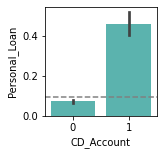


_____________________

Online 
_____________________

       chi2  p-value  degrees of freedom
0  0.156007  0.69286                   1

observed:
 Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000

expected:
           0        1
0  1822.464  193.536
1  2697.536  286.464


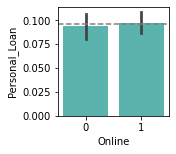


_____________________

CreditCard 
_____________________

       chi2   p-value  degrees of freedom
0  0.021144  0.884386                   1

observed:
 Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000

expected:
          0       1
0  3191.12  338.88
1  1328.88  141.12


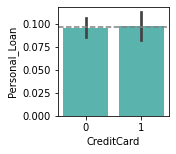


_____________________

Age 
____________________



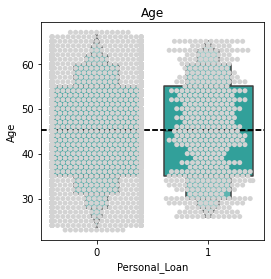

                count       mean        std   min   25%   50%   75%   max
Personal_Loan                                                            
0              4520.0  45.367257  11.450427  23.0  35.0  45.0  55.0  67.0
1               480.0  45.066667  11.590964  26.0  35.0  45.0  55.0  65.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1102125.0, pvalue=0.564396456253154)

____________________

Income 
____________________



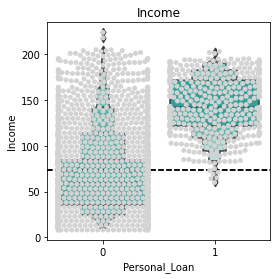

                count        mean        std   min    25%    50%    75%    max
Personal_Loan                                                                 
0              4520.0   66.237389  40.578534   8.0   35.0   59.0   84.0  224.0
1               480.0  144.745833  31.584429  60.0  122.0  142.5  172.0  203.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=169085.0, pvalue=1.0351753680641503e-203)

____________________

CCAvg 
____________________



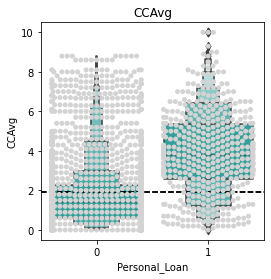

                count      mean       std  min  25%  50%     75%   max
Personal_Loan                                                         
0              4520.0  1.729009  1.567647  0.0  0.6  1.4  2.3000   8.8
1               480.0  3.905354  2.097681  0.0  2.6  3.8  5.3475  10.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=417591.0, pvalue=3.5994500226523643e-109)

____________________

Mortgage 
____________________



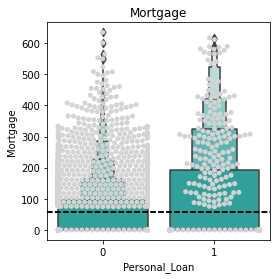

                count        mean         std  min  25%  50%    75%    max
Personal_Loan                                                             
0              4520.0   51.789381   92.038931  0.0  0.0  0.0   98.0  635.0
1               480.0  100.845833  160.847862  0.0  0.0  0.0  192.5  617.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=974814.5, pvalue=7.638092866051238e-06)

____________________



In [18]:
# calling bivariate_univariate() function from wrangle to perform univariate Analysis 

wrangle.explore_bivariate(loan, target, cat_var, quant_vars)

## Key Takeaway from the Univariate Analysis
### After performing chi2 test for question 1 through 6 here are the results
- 1) With a low P value, We reject our 1st null hypothesis that the Average of family having personal loan is the same in each family group. Customers with Family of 3 or more are likely to get personal loan than customers with family off 1 or 2
- 2) With a low p value, We reject our 2nd null hypothesis that  The Average of customers having personal loan is the same in each education groups. Customers with graduate and advanced degrees are more likely to get personal loan than undergrad customers 

- 3) With a p value higher than 0.05, We fail reject our 3rd null hypothesis that The Average of customers having personal loan is the same for those who have Security Account and those who don’t. Although the visualization suggest that customers  with Security account may get loan than those who do not own a security Account

- 4) With a low p value, We reject our 4th null hypothesis that  The Average of customers having personal loan is the same for those who have Certificate of deposit Account and those who don’t.

- 5)With a p value higher than 0.05, We fail reject our 3rd null hypothesis that The Average of customers having personal loan is the same for those who have Online banking and those who don’t.

- 6) With a p value higher than 0.05, We fail reject our 3rd null hypothesis that The Average of customers having personal loan is the same for those who have a Credit card and those who don’t.

### After performing Mann-Whitney Test for questions 7 to 10

- 7) With a p  value higher than 0.05 , we fail to  conclude that there is a linear relationship between Age and personal loan

- 8) With  a low p value, we can conclude that there is in fact a linear relationship between Income and personal loan. Although there might be some outliers in the income distribution,  The visualization suggests that customers with highr income are more likely to get loan than those with lower income. 

- 9) With  a low p value, we can conclude that there is in fact a linear relationship between Credit Card Avg Spending and personal loan. Customers who have a personal loan spend more on average than those who don't. Againg there might be some outliers here as well.

- 10) With  a low p value, we can conclude that there is in fact a linear relationship between Mortgage and personal loan. Customers who have a personal loan have expensive houses than those who don't. Againg there might be some outliers here as well.

### Outliers
Outliers are found in the Mortgage , Income and Credit card Spending averages and as such, we can not completely trust all the statistical tests . Lets visualize with and without outliers 

In [ ]:
wrangle.distribution_plot_wrt_target(loan, 'Mortgage', target)

In [ ]:
wrangle.distribution_plot_wrt_target(loan, 'Income', target)

In [ ]:
wrangle.distribution_plot_wrt_target(loan, 'CCAvg', target)

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Takeaway  
- Without outliers, we notice that, not many customers have mortgages. Most customers who do have mortgages and personal loan have high home value than those who don’t .
- without outliers, the average income of customers who have personal loan is higher approximately 135k. Those who don’t have a a personal loan have an average inome of approximately 60k
- without outliers, the average Spending of customers who have personal loan is higher approximately 3.8k. Those who don’t have a a personal loan have an average inome of approximately 1.75k

- On the correlation matrix, we see that experience and age, CCAvg and income, personal loan and income, CD and CCavg, CD. and credit card, CD and Security deposit  are Positively  correlated. Although we we have to keep in mind that correlation is not causation .

## Multivariate visualization 

In [ ]:
wrangle.explore_multivariate(loan, target, cat_var, quant_vars2)

In [ ]:
sns.pairplot(loan, hue= target)
plt.show()

## Key Takeaway from the Multivariate Analysis
- Relative to age group, few customers have a Certificate of deposit (CD_Account), and those customers are more likely to get a personal loan
- Relative to income, customers with a family of 3 or more, with a graduate or Advanced degree, and with a CD Account are more likely to be have personal loan
- Relative to credit card spending, customers with an average from approximately 3.8k t0 6k  month, with a family of3 or more, with advanced degrees and cD Account are more likely to have a personal loan.

# Splitting data into train and test
## Actions for data pre-processing:
- lets take care of the outliers first
- all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
- all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker

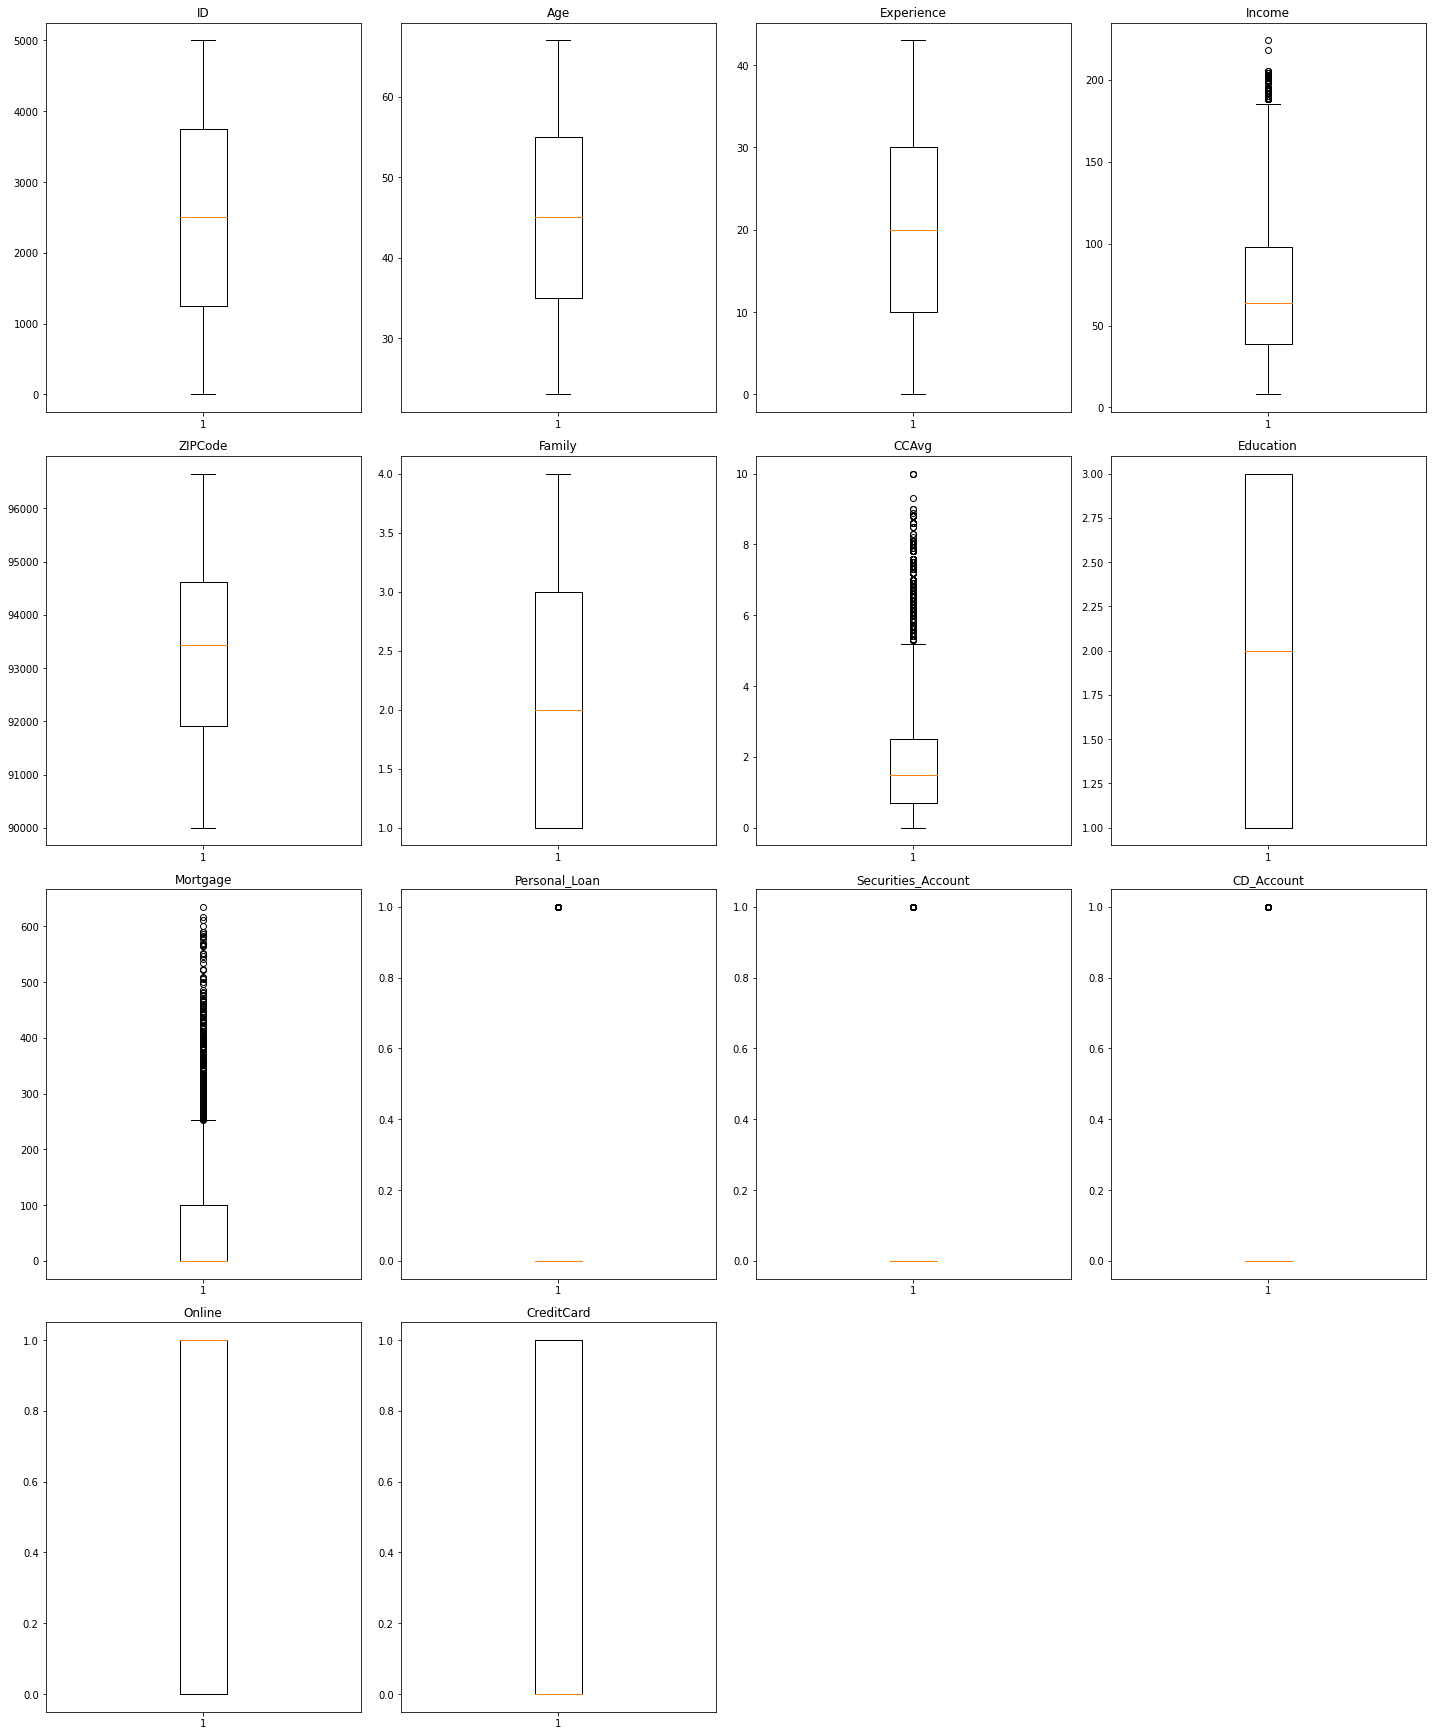

In [19]:
# Detecting all outliers in case we missed some in exploration
numerical_col = loan.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Mortgage , Income , and CCavg have upper outliers

In [21]:
numerical_col2 = ['Mortgage', 'Income', 'CCAvg']
loan = wrangle.treat_outliers_all(loan, numerical_col2)

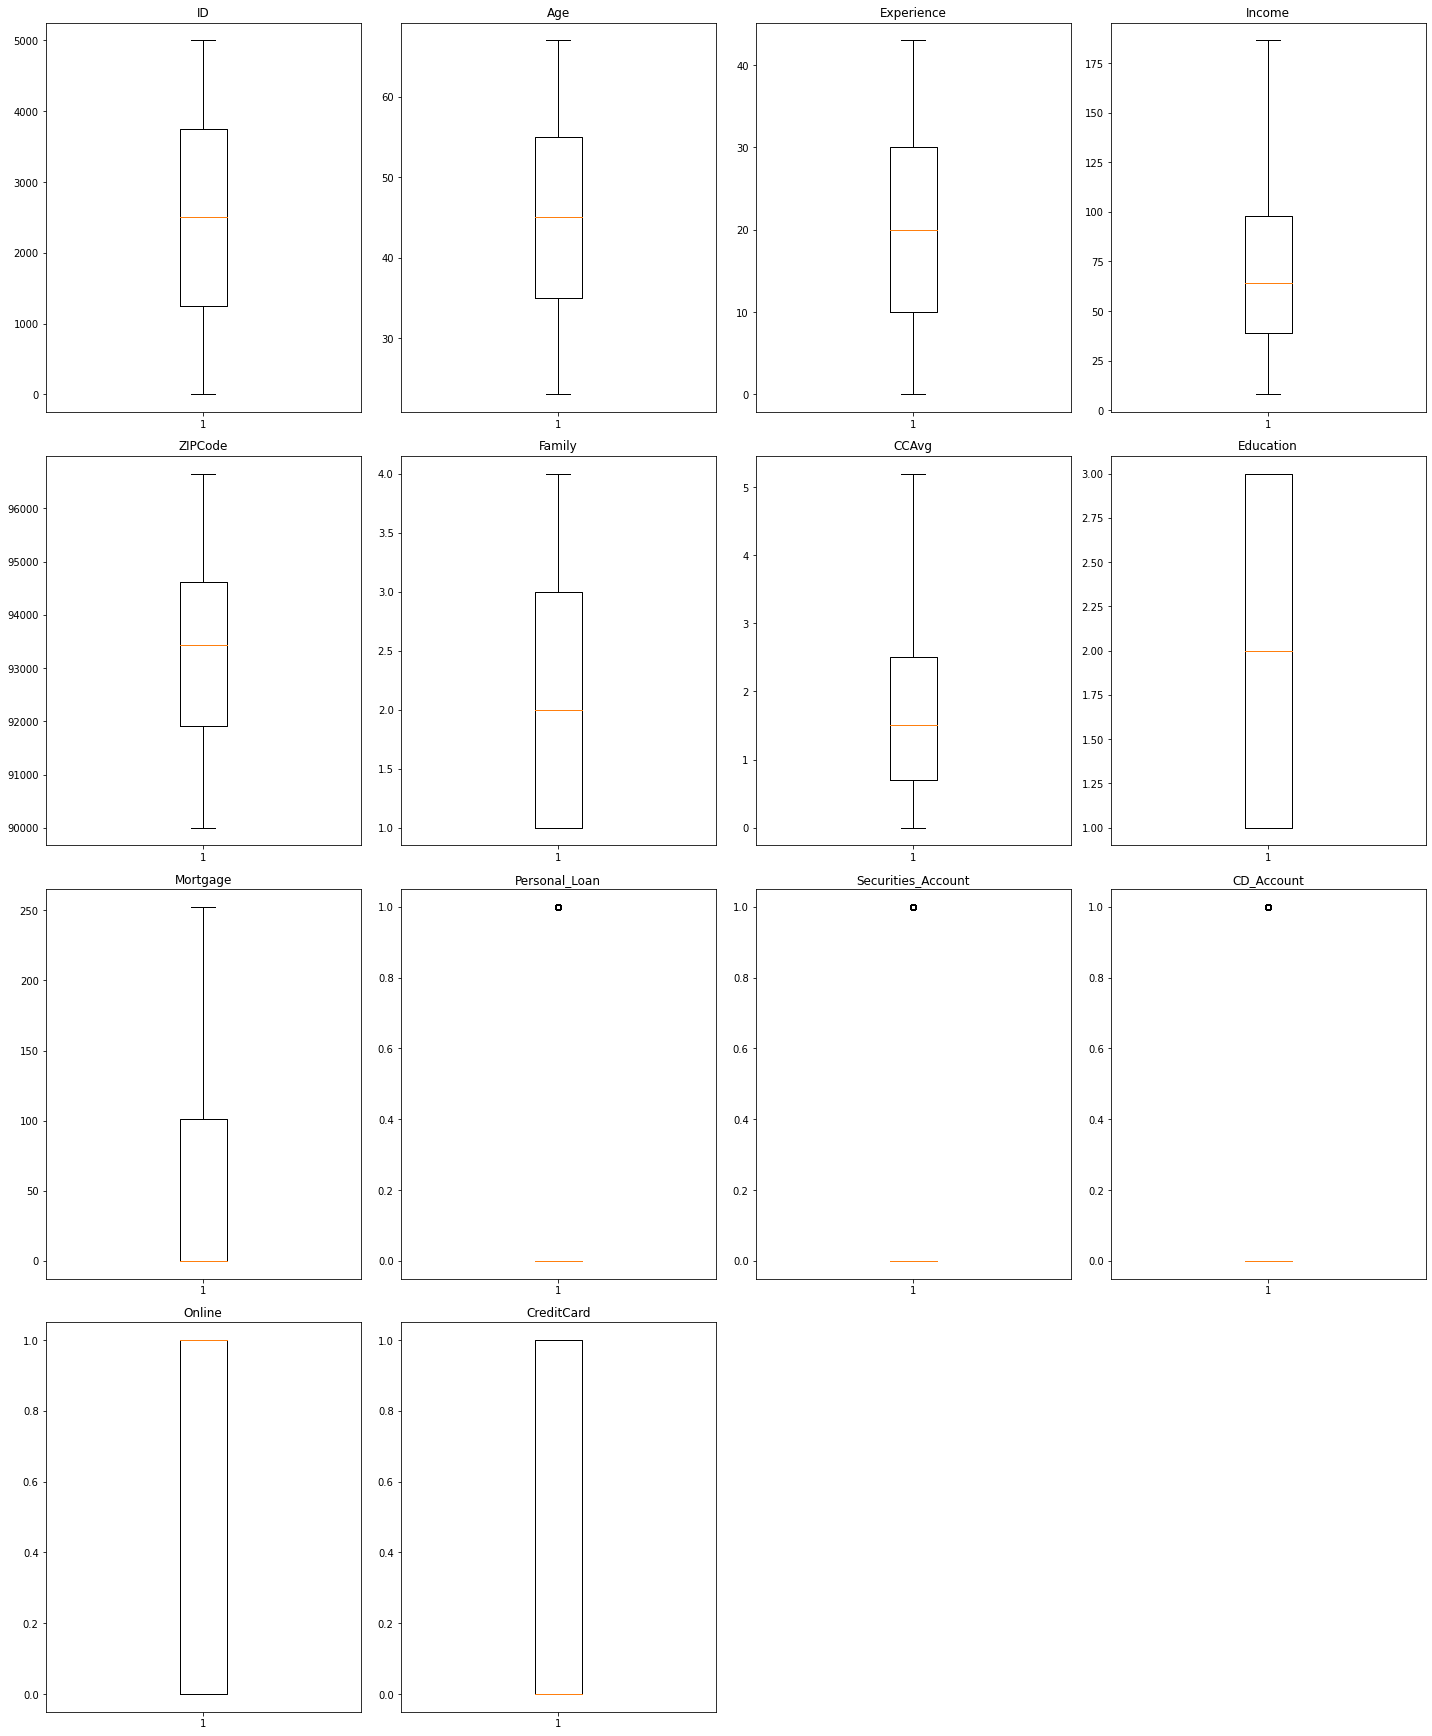

In [22]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [23]:
# confirming that removing outliers did not remove customers with loan
loan[loan.Personal_Loan ==1]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,10,34,9,180.0,93023,1,5.2,3,0.0,1,0,0,0,0
16,17,38,14,130.0,95010,4,4.7,3,134.0,1,0,0,0,0
18,19,46,21,186.5,91604,2,5.2,3,0.0,1,0,0,0,0
29,30,38,13,119.0,94104,1,3.3,2,0.0,1,0,1,1,1
38,39,42,18,141.0,94114,3,5.0,3,0.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129.0,92646,3,4.1,3,0.0,1,0,1,1,1
4927,4928,43,19,121.0,94720,1,0.7,2,0.0,1,0,1,1,1
4941,4942,28,4,112.0,90049,2,1.6,2,0.0,1,0,0,1,0
4962,4963,46,20,122.0,90065,3,3.0,3,0.0,1,0,1,1,1


In [24]:
# creating dummy variables 
loan = pd.get_dummies(loan, columns=['Family', 'Education'], drop_first=True)

In [25]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,1,25,1,49.0,91107,1.6,0.0,0,1,0,0,0,0,0,1,0,0
1,2,45,19,34.0,90089,1.5,0.0,0,1,0,0,0,0,1,0,0,0
2,3,39,15,11.0,94720,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100.0,94112,2.7,0.0,0,0,0,0,0,0,0,0,1,0
4,5,35,8,45.0,91330,1.0,0.0,0,0,0,0,1,0,0,1,1,0


# Modeling
- Creating training and test sets.



In [31]:
X = loan.drop(["ID","Personal_Loan"], axis=1)
Y = loan["Personal_Loan"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [32]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 15)
Shape of test set :  (1500, 15)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


##Logistic Regression


In [33]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
 

In [34]:
model = lg.fit(X_train, y_train)

## Finding the Coefficients 

In [35]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Intercept
Coefficients,-0.039956,0.046911,0.058012,-0.000102,0.472247,0.001209,-0.672047,2.884483,-0.484073,-0.744892,-0.108467,2.263973,1.482415,3.459284,3.678291,-2.445367


### coefficient Interpretation 
- Coefficient of Age, Security Accounts, Online banking, Credit Card and Family of 1 and 2 are negatives. Increase in these, will lead to decrease chances of having a loan.
- Coefficient of CD_Account, Credit Card spending , Education,  and Family of 3 and 4 are positives. Increase in these, will lead to increase chances of having a loan.

### Converting Coefficient to odds
- The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
- Therefore, odds = exp(b)
- The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [36]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T


,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
Odds,0.960832,1.048028,1.059728,0.999898,1.603593,1.001210,0.510662,17.894315,0.616268,0.474786,0.897208,9.621236,4.403568,31.794219,39.578688
Change_odd%,-3.916836,4.802827,5.972753,-0.010209,60.359287,0.120984,-48.933796,1689.431529,-38.373208,-52.521423,-10.279153,862.123639,340.356848,3079.421896,3857.868809


### Interpretation 
- age: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having a Personal loan by 0.96 times or a 3.91% decrease in odds of having a loan.
- SecurityAccount : Holding all other features constant a 1 unit change in Security_Account will decrease the odds of a person having a Personal loan by 0.51 times or a 48.93% decrease in odds of having a loan.
- Online Banking : Holding all other features constant a 1 unit change in Onlinebanking will decrease the odds of a person having a Personal loan by 0.62 times or a 38% decrease in odds of having a loan.
- CreditCard : Holding all other features constant a 1 unit change in CreditCard will decrease the odds of a person having a Personal loan by 0.47 times or a 53% decrease in odds of having a loan.
- Family(of 2 or less) : Holding all other features constant a 1 unit change in Family size will decrease the odds of a person having a Personal loan by 0.51 times or a 48.93% decrease in odds of having a loan. We also note that family of 3 or 4 have high chances of getting a loan

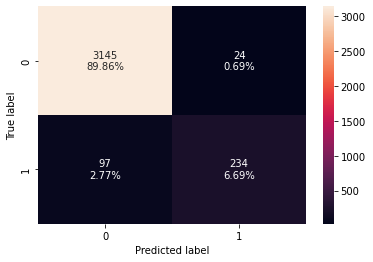

In [39]:
# Confusion matrix with threshold 
wrangle.confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [40]:
log_reg_model_train_perf = wrangle.model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.965429,0.706949,0.906977,0.794567


### Checking performance on test

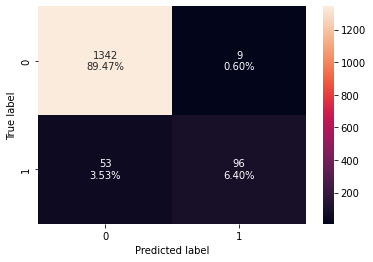

In [41]:
# creating confusion matrix
wrangle.confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)


In [42]:
log_reg_model_test_perf = wrangle.model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.958667,0.644295,0.914286,0.755906


#### ROC-AUC
- ROC-AUC on training set

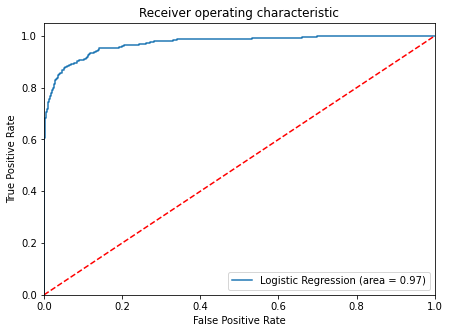

In [43]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- ROC-AUC on test set

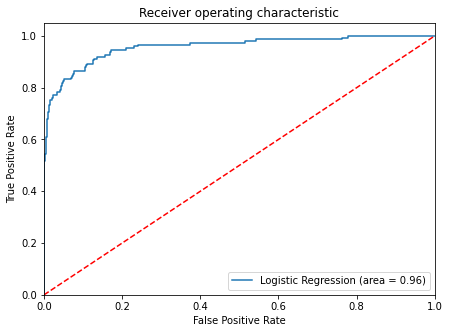

In [44]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- There is no significant improvement 

#### Model Improvement 

- lets see if the f1 Score can be improved by changing the threshold. Using AUC-ROC curve

#### What is our optimal threshold using AUC-ROC ?

In [45]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.17126326717988935


#### Checking model performance on training set

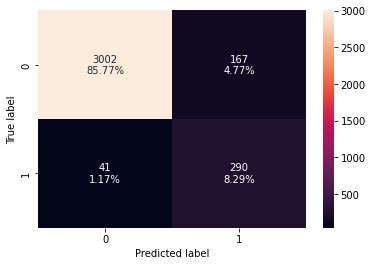

In [46]:
# creating confusion matrix
wrangle.confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [47]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = wrangle.model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.940571,0.876133,0.634573,0.736041


#### Checking model performance on test set

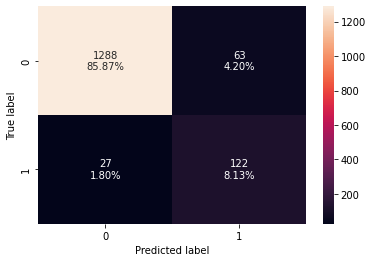

In [48]:
# creating confusion matrix
wrangle.confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [49]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = wrangle.model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.94,0.818792,0.659459,0.730539


- The precision of the model for both training and test set has improved but the F1 score has no significant change.

### Let's use Precision-Recall curve and see if we can find a better threshold

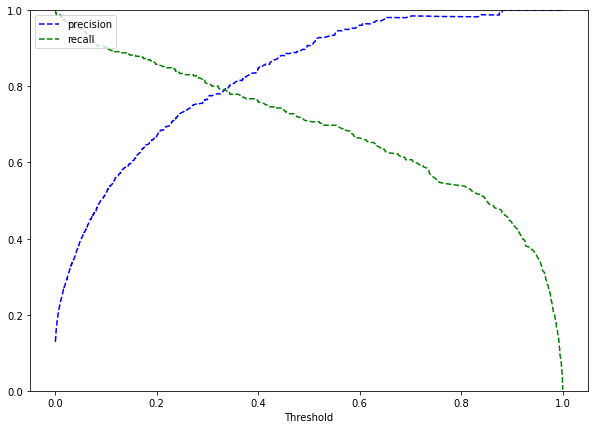

In [50]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At the threshold of 0.33, we get balanced recall and precision.

In [51]:
# setting the threshold
optimal_threshold_curve = 0.33

#### Checking model performance on training set

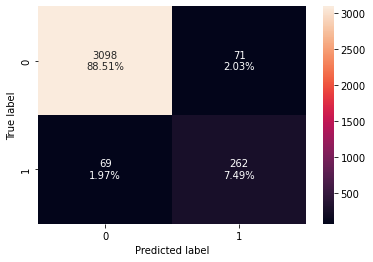

In [52]:
# creating confusion matrix
wrangle.confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [53]:
log_reg_model_train_perf_threshold_curve = wrangle.model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.96,0.791541,0.786787,0.789157


#### Checking model performance on test set

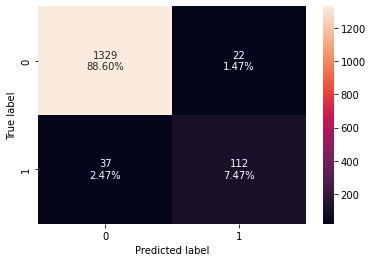

In [54]:
# creating confusion matrix
wrangle.confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [55]:
log_reg_model_test_perf_threshold_curve = wrangle.model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve


Test set performance:


,Accuracy,Recall,Precision,F1
0,0.960667,0.751678,0.835821,0.791519


- model is performing better on the train and test set


## Logistic Regression Performance Summary

In [56]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.17 Threshold",
    "Logistic Regression-0.33 Threshold"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.17 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.965429,0.940571,0.960000
Recall,0.706949,0.876133,0.791541
Precision,0.906977,0.634573,0.786787
F1,0.794567,0.736041,0.789157


In [58]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T
        ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.17 Threshold",
    "Logistic Regression-0.33 Threshold"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.17 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.958667,0.940000,0.960667
Recall,0.644295,0.818792,0.751678
Precision,0.914286,0.659459,0.835821
F1,0.755906,0.730539,0.791519


## Key Takeaway logistic regression
- We have been able to build a predictive model that can be used by to  whether or not a customer will get a personal loan with an f1_score of 0.79 on the training set and formulate policies accordingly.
- Coefficient of Age, Security Accounts, Online banking, Credit Card and Family of 1 and 2 are negatives. Increase in these, will lead to decrease chances of having a loan.
- Coefficient of CD_Account, Credit Card spending , Education,  and Family of 3 and 4 are positives. Increase in these, will lead to increase chances of having a loan.

# Model Decision Tree

- Education, Income, Family, are the top 3 important features.


## Using GridSearch for Hyperparameter tuning of our tree model


### Checking performance on training set¶


- The Recall has not improved on the training set as compared to the initial model.

## Checking model performance on test set

- After hyperparameter tuning the model has performance has remained same and the model has become simpler.

- We are getting a simplified tree after pre-pruning.

### Cost Complexity Pruning

- Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.